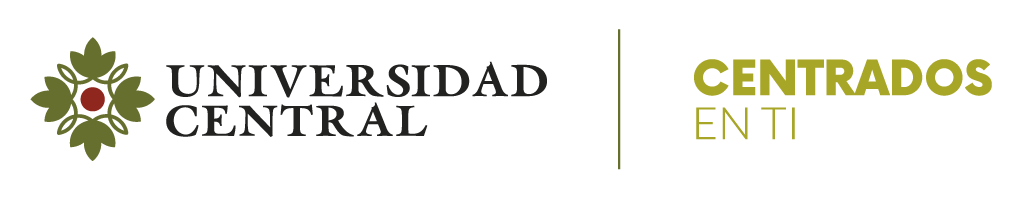

---
# Librería `pandas`
---

Será nuestra librería base para trabajar con los `dataframe`, es decir, una estructura de datos bidimensional, donde las columnas serán las variables o características y las filas serán los registro. Es una librería que trabaja a la par con muchas de las librerías de **Python**. Puede consultar más información en la página oficial de [`pandas.`](https://pandas.pydata.org/docs/index.html)

In [1]:
# Instalar pandas
# !pip install pandas

In [2]:
#!pip install -r requirements.txt

In [3]:
## Librerías requeridas
import numpy as np
import pandas as pd

---
## Series
---
Vamos a explorar la estructura de serie en `pandas`. Debemos al final estar
familiarizados en cómo almacenar y manipular datos indexados unidimensionales.

La serie es una de las estructuras de datos esenciales en `pandas`. Todos los elementos se almacenan en la serie y hay etiquetas con las que se puede recuperarlos. Una forma sencilla de pensar una serie en `pandas` son las columnas de datos. El primero es el índice especial, muy parecido a las llaves o keys de un diccionario. Mientras que el segundo son los datos reales. Es importante tener en cuenta que la columna de datos tiene una etiqueta propia y se puede recuperar.

In [4]:
estudiantes = ["Maria", "Juan", "Alejandra"]
pd.Series(estudiantes)

0        Maria
1         Juan
2    Alejandra
dtype: str

El resultado es una serie de `pandas`, los índices son dados automaticamente siguiendo en orden de los números naturales. Además `pandas` identificó el tipo de datos de esta serie como "object" y estandariza el tipo de dato buscando el que mejor corresponda.

In [5]:
estudiantes = {
    "Maria": "Química",
    "Juan": "Sociales",
    "Alejandra": "Matemáticas"
}
estudiantes

{'Maria': 'Química', 'Juan': 'Sociales', 'Alejandra': 'Matemáticas'}

In [6]:
# En el caso de tener un diccionario las claves o keys serán los índices y los valores
# la asignación a dicho índice
pd.Series(estudiantes)

Maria            Química
Juan            Sociales
Alejandra    Matemáticas
dtype: str

In [7]:
serie = pd.Series(estudiantes)
display(serie)
print(type(serie))

Maria            Química
Juan            Sociales
Alejandra    Matemáticas
dtype: str

<class 'pandas.Series'>


In [8]:
# Error
# serie[0], serie[1], serie[2]

In [9]:
serie.index

Index(['Maria', 'Juan', 'Alejandra'], dtype='str')

In [10]:
# serie['Maria'], serie[0]

In [11]:
for i in serie.index:
    print(f'El índice {i} tiene el valor {serie[i]}')

El índice Maria tiene el valor Química
El índice Juan tiene el valor Sociales
El índice Alejandra tiene el valor Matemáticas


In [12]:
# El índice se genera automaticamente desde 0 hasta el número de entradas en la lista.
numeros = [1, 2, 3]
pd.Series(numeros)

0    1
1    2
2    3
dtype: int64

In [13]:
# En las series de pandas puede usted mismo asignar los valores a los índices.
pd.Series(numeros, index=["Uno", "Dos", "Tres"])

Uno     1
Dos     2
Tres    3
dtype: int64

In [14]:
serie_1 = pd.Series(["Química", "Matemáticas", "Química","Sociales"],
                    index=["Maria", "Juan", "Carlos","Alison"])
serie_1

Maria         Química
Juan      Matemáticas
Carlos        Química
Alison       Sociales
dtype: str

In [15]:
serie_2 = pd.Series(["Química", "Matemáticas", "Química", None],
                    index=["Maria", "Juan", "Carlos","Alison"])
serie_2

Maria         Química
Juan      Matemáticas
Carlos        Química
Alison            NaN
dtype: str

In [16]:
serie_3 = pd.Series([1, 2, 3, None], index=['Maria', 'Juan', 'Carlos','Alison'])
serie_3

Maria     1.0
Juan      2.0
Carlos    3.0
Alison    NaN
dtype: float64

In [17]:
notas_clase = {99: 'Matemáticas',
               100: 'Química',
               101: 'Inglés',
               102: 'Sociales'}
serie_4 = pd.Series(notas_clase)
display(serie_4)
print()
serie_4[102]

99     Matemáticas
100        Química
101         Inglés
102       Sociales
dtype: str

'Sociales'

In [18]:
# OJO
# serie_4[0]

In [19]:
serie_1

Maria         Química
Juan      Matemáticas
Carlos        Química
Alison       Sociales
dtype: str

In [20]:
# Metodo unique()
serie_1.unique()

<StringArray>
['Química', 'Matemáticas', 'Sociales']
Length: 3, dtype: str

In [21]:
# Método value_counts()
serie_1.value_counts()

Química        2
Matemáticas    1
Sociales       1
Name: count, dtype: int64

In [22]:
display(serie_1)
print()
display(serie_2)
##
print("\nAcá el append:")
pd.concat([serie_1, serie_2], ignore_index=False)

Maria         Química
Juan      Matemáticas
Carlos        Química
Alison       Sociales
dtype: str

Maria         Química
Juan      Matemáticas
Carlos        Química
Alison            NaN
dtype: str


Acá el append:


Maria         Química
Juan      Matemáticas
Carlos        Química
Alison       Sociales
Maria         Química
Juan      Matemáticas
Carlos        Química
Alison            NaN
dtype: str

In [23]:
pd.concat([serie_1, serie_2], ignore_index=True)

0        Química
1    Matemáticas
2        Química
3       Sociales
4        Química
5    Matemáticas
6        Química
7            NaN
dtype: str

In [24]:
pd.concat([serie_1, serie_2], ignore_index=False)["Carlos"]

Carlos    Química
Carlos    Química
dtype: str

In [25]:
pegado = pd.concat([serie_1, serie_2], ignore_index=False)
pegado.unique()

<StringArray>
['Química', 'Matemáticas', 'Sociales', nan]
Length: 4, dtype: str

In [26]:
pegado

Maria         Química
Juan      Matemáticas
Carlos        Química
Alison       Sociales
Maria         Química
Juan      Matemáticas
Carlos        Química
Alison            NaN
dtype: str

In [27]:
## Reemplazar un valor en un índice.
pegado["Maria"] = "Artes"
pegado

Maria           Artes
Juan      Matemáticas
Carlos        Química
Alison       Sociales
Maria           Artes
Juan      Matemáticas
Carlos        Química
Alison            NaN
dtype: str

In [28]:
## Eliminar un índice
display(pegado.drop("Carlos"))

Maria           Artes
Juan      Matemáticas
Alison       Sociales
Maria           Artes
Juan      Matemáticas
Alison            NaN
dtype: str

In [29]:
pegado

Maria           Artes
Juan      Matemáticas
Carlos        Química
Alison       Sociales
Maria           Artes
Juan      Matemáticas
Carlos        Química
Alison            NaN
dtype: str

In [30]:
pegado1 = pegado.copy()
pegado1.drop("Carlos", inplace=True)
pegado1

Maria           Artes
Juan      Matemáticas
Alison       Sociales
Maria           Artes
Juan      Matemáticas
Alison            NaN
dtype: str

In [31]:
## Eliminar una lista de índices
pegado.drop(["Carlos", "Juan"])

Maria        Artes
Alison    Sociales
Maria        Artes
Alison         NaN
dtype: str

In [32]:
pegado

Maria           Artes
Juan      Matemáticas
Carlos        Química
Alison       Sociales
Maria           Artes
Juan      Matemáticas
Carlos        Química
Alison            NaN
dtype: str

In [33]:
# Ingresar un nuevo registro.
pegado["Persona_sin_nombre"] = "Culinaría"
pegado["Persona_sin_nombre1"] = "Culinaría"
pegado

Maria                        Artes
Juan                   Matemáticas
Carlos                     Química
Alison                    Sociales
Maria                        Artes
Juan                   Matemáticas
Carlos                     Química
Alison                         NaN
Persona_sin_nombre       Culinaría
Persona_sin_nombre1      Culinaría
dtype: str

In [34]:
## Eliminar los registros faltantes.
pegado.dropna()

Maria                        Artes
Juan                   Matemáticas
Carlos                     Química
Alison                    Sociales
Maria                        Artes
Juan                   Matemáticas
Carlos                     Química
Persona_sin_nombre       Culinaría
Persona_sin_nombre1      Culinaría
dtype: str

In [35]:
pegado

Maria                        Artes
Juan                   Matemáticas
Carlos                     Química
Alison                    Sociales
Maria                        Artes
Juan                   Matemáticas
Carlos                     Química
Alison                         NaN
Persona_sin_nombre       Culinaría
Persona_sin_nombre1      Culinaría
dtype: str

In [36]:
## Eliminar los registros duplicados (por default se queda con el primer registro encontrado.)
display(pegado)
pegado.drop_duplicates(inplace=True)
pegado

Maria                        Artes
Juan                   Matemáticas
Carlos                     Química
Alison                    Sociales
Maria                        Artes
Juan                   Matemáticas
Carlos                     Química
Alison                         NaN
Persona_sin_nombre       Culinaría
Persona_sin_nombre1      Culinaría
dtype: str

Maria                       Artes
Juan                  Matemáticas
Carlos                    Química
Alison                   Sociales
Alison                        NaN
Persona_sin_nombre      Culinaría
dtype: str

In [37]:
pegado

Maria                       Artes
Juan                  Matemáticas
Carlos                    Química
Alison                   Sociales
Alison                        NaN
Persona_sin_nombre      Culinaría
dtype: str

In [38]:
# Serie booleana
pegado.isna()

Maria                 False
Juan                  False
Carlos                False
Alison                False
Alison                 True
Persona_sin_nombre    False
dtype: bool

---
## Dataframes.
---

DataFrame es el corazón de la biblioteca de `pandas`. La estructura de datos DataFrame es el objeto principal en el que se trabaja en el análisis de datos y tareas de limpieza.

El DataFrame es conceptualmente un objeto de serie bidimensional, donde hay un índice y múltiples columnas, cada columna con una etiqueta. De hecho, la distinción entre una columna y una fila es realmente sólo una
distinción conceptual. Un  DataFrame es una matriz etiquetada de dos ejes.


In [39]:
registro1 = pd.Series({"Nombre": "Alicia",
                       "Asignatura": "Física",
                       "Puntuación": 85})
registro2 = pd.Series({"Nombre": "Andrés",
                       "Asignatura": "Química",
                       "Puntuación": 82})
registro3 = pd.Series({"Nombre": "Helen",
                       "Asignatura": "Biología",
                       "Puntuación": 90})

In [40]:
registro1

Nombre        Alicia
Asignatura    Física
Puntuación        85
dtype: object

In [41]:
df = pd.DataFrame(
    data=[registro1, registro2, registro3],
    index=["estudiante1","estudiante2","estudiante3"]
)

df

,Nombre,Asignatura,Puntuación
estudiante1,Alicia,Física,85
estudiante2,Andrés,Química,82
estudiante3,Helen,Biología,90


In [42]:
type(df)

pandas.DataFrame

In [43]:
# Podemos formar un dataframe apartir de una lista con diccionarios, cada uno será un
# registro del dataframe.
estudiantes = [{'Nombre': 'Alicia','Asignatura': 'Física', 'Puntuación': 85},
               {'Asignatura': 'Química', 'Nombre': 'Andrés', 'Puntuación': 82},
               {'Nombre': 'Helen','Asignatura': 'Biología', 'Puntuación': 90}]
pd.DataFrame(estudiantes, index=['estudiante1','estudiante2','estudiante3'])

,Nombre,Asignatura,Puntuación
estudiante1,Alicia,Física,85
estudiante2,Andrés,Química,82
estudiante3,Helen,Biología,90


In [44]:
pd.Series({'Nombre': 'Alicia',"Asignatura": 'Física', 'Puntuación': 85})

Nombre        Alicia
Asignatura    Física
Puntuación        85
dtype: object

In [45]:
estudiantes

[{'Nombre': 'Alicia', 'Asignatura': 'Física', 'Puntuación': 85},
 {'Asignatura': 'Química', 'Nombre': 'Andrés', 'Puntuación': 82},
 {'Nombre': 'Helen', 'Asignatura': 'Biología', 'Puntuación': 90}]

In [46]:
pd.DataFrame(estudiantes)

,Nombre,Asignatura,Puntuación
0,Alicia,Física,85
1,Andrés,Química,82
2,Helen,Biología,90


In [47]:
df

,Nombre,Asignatura,Puntuación
estudiante1,Alicia,Física,85
estudiante2,Andrés,Química,82
estudiante3,Helen,Biología,90


In [48]:
df["Nueva"] = 50
df

,Nombre,Asignatura,Puntuación,Nueva
estudiante1,Alicia,Física,85,50
estudiante2,Andrés,Química,82,50
estudiante3,Helen,Biología,90,50


In [49]:
# Error  con la edad.
df["edad"] = [22, 25, 19]
df

,Nombre,Asignatura,Puntuación,Nueva,edad
estudiante1,Alicia,Física,85,50,22
estudiante2,Andrés,Química,82,50,25
estudiante3,Helen,Biología,90,50,19


In [50]:
df.drop(columns=["edad"], inplace=True)
df

,Nombre,Asignatura,Puntuación,Nueva
estudiante1,Alicia,Física,85,50
estudiante2,Andrés,Química,82,50
estudiante3,Helen,Biología,90,50


In [51]:
df["edad"] = [22, 25, 19]
df

,Nombre,Asignatura,Puntuación,Nueva,edad
estudiante1,Alicia,Física,85,50,22
estudiante2,Andrés,Química,82,50,25
estudiante3,Helen,Biología,90,50,19


In [52]:
pd.concat(
    [
        df,
        pd.DataFrame(
            [
                {
                    "Nombre": "Luisa",
                    "Asignatura": "Artes",
                    "Puntuación": "100",
                    "Nueva": "45",
                    "edad": 26,
                }
            ]
        ),
    ],
    ignore_index=True,
 )

,Nombre,Asignatura,Puntuación,Nueva,edad
0,Alicia,Física,85,50,22
1,Andrés,Química,82,50,25
2,Helen,Biología,90,50,19
3,Luisa,Artes,100,45,26


In [53]:
## Ejercicio: En el df, debes adicionar un nuevo registro con la información
## {'Nombre':'Luisa','Asignatura':'Artes','Puntuación':'100','Nueva':'45', 'edad':26}.
## El pd.DataFrame debe tener en el indice del nuevo registro estudiante4.

In [54]:
pd.concat([df, df], axis=0)

,Nombre,Asignatura,Puntuación,Nueva,edad
estudiante1,Alicia,Física,85,50,22
estudiante2,Andrés,Química,82,50,25
estudiante3,Helen,Biología,90,50,19
estudiante1,Alicia,Física,85,50,22
estudiante2,Andrés,Química,82,50,25
estudiante3,Helen,Biología,90,50,19


In [55]:
pd.concat([df, df], axis=1)

,Nombre,Asignatura,Puntuación,Nueva,edad,Nombre,Asignatura,Puntuación,Nueva,edad
estudiante1,Alicia,Física,85,50,22,Alicia,Física,85,50,22
estudiante2,Andrés,Química,82,50,25,Andrés,Química,82,50,25
estudiante3,Helen,Biología,90,50,19,Helen,Biología,90,50,19


In [56]:
df.shape

(3, 5)

In [57]:
df.columns

Index(['Nombre', 'Asignatura', 'Puntuación', 'Nueva', 'edad'], dtype='str')

In [58]:
df.index

Index(['estudiante1', 'estudiante2', 'estudiante3'], dtype='str')

In [59]:
df.isna()

,Nombre,Asignatura,Puntuación,Nueva,edad
estudiante1,False,False,False,False,False
estudiante2,False,False,False,False,False
estudiante3,False,False,False,False,False


---
## Conclusiones:
---

Revisamos como importar la librería `pandas`. Se conocieron los objetos de datos: `serie` y `dataframe`. Para cada uno de ellos se mostró la forma de construirlos y algunas consultas básica.